# 1 参数估计

## 1.1 贝叶斯估计

将贝叶斯估计离散化，并运用部分技巧使其避免上溢与下溢出：
(3-33)式变为：
$p(H|\theta_j)=\prod\limits_{i=1}^Np(x_i|\theta_j), \quad j=1,2,\cdots,M$
其中$M$是$\theta$采样的个数；
并且有：
$p(H|\theta_j)p(\theta_j)=\prod\limits_{i=1}^Np(x_i|\theta_j)p(\theta_j), \quad j=1,2,\cdots,M$
连续空间的积分相当于离散空间的求和：
$\int p(H|\theta)p(\theta) d\theta = \sum\limits_{j=1}^Mp(H|\theta_j)p(\theta_j)=\sum\limits_{j=1}^M\prod\limits_{i=1}^Np(x_i|\theta_j)p(\theta_j)$
此时式(3-34)可化为：
$p(\theta_j|H)=\frac{\prod\limits_{i=1}^Np(x_i|\theta_j)p(\theta_j)}{\sum\limits_{j=1}^M\prod\limits_{i=1}^Np(x_i|\theta_j)p(\theta_j)}, \quad j=1,2,\cdots,M$

分子有连乘号，当采样数目无穷大时，无穷多个非1概率值之积为0，发生下溢，考虑取对数：
$\ln{p(\theta_j|H)}=\sum\limits_{i=1}^N\ln{p(x_i|\theta_j)p(\theta_j)}-\ln{\sum\limits_{j=1}^M\prod\limits_{i=1}^Np(x_i|\theta_j)p(\theta_j)}$
令：$a_j=\sum\limits_{i=1}^N\ln{p(x_i|\theta_j)p(\theta_j)}=\ln{\prod\limits_{i=1}^Np(x_i|\theta_j)p(\theta_j)}$
有：$\prod\limits_{i=1}^Np(x_i|\theta_j)p(\theta_j)=e^{a_j}$
代入$\ln{p(\theta_j|H)}$中有：
$\ln{p(\theta_j|H)}=a_j-\ln{\sum\limits_{j=1}^Me^{a_j}}$
由于$a_j$十分的小(某个实例可达-40000，而$e^{-1000}$之前即会发生下溢)，所以有必要进一步作出如下变换：
$\ln{p(\theta_j|H)}=a_j-(\ln{\frac{\sum\limits_{j=1}^Me^{a_j}}{e^{\max{a_j}}}}+\ln{e^{\max{a_j}}})=a_j-\max{a_j}-\ln{\sum\limits_{j=1}^Me^{a_j-\max{a_j}}}$

*************************************x_nums=10, theta_nums=1000*************************************
Saving figure x与mu采样图, x_sample=10


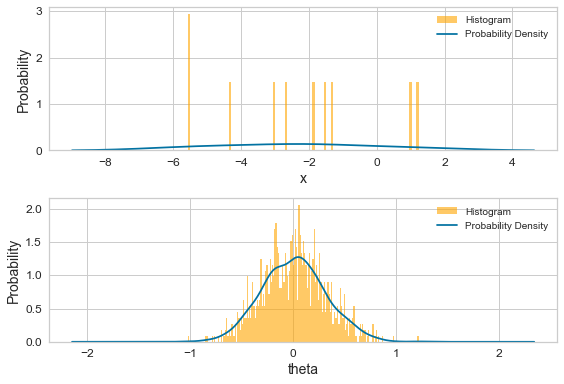

式3-51中，采样均值加权：9.09%；先验加权：90.91%
观测均值m_N：-2.35859150765662；先验mu_0：0
数值计算mu：-0.017815797113917727；理论计算mu_N：-0.21441740978696547
数值计算与式3-51误差：91.69%
*************************************x_nums=30, theta_nums=1000*************************************
Saving figure x与mu采样图, x_sample=30


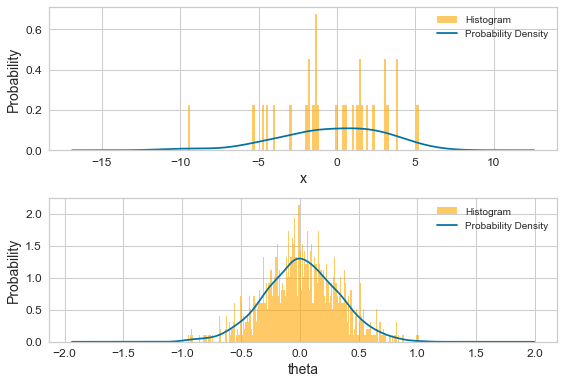

式3-51中，采样均值加权：23.08%；先验加权：76.92%
观测均值m_N：-0.30789173076993337；先验mu_0：0
数值计算mu：-0.004714404443958014；理论计算mu_N：-0.07105193786998462
数值计算与式3-51误差：93.36%
************************************x_nums=300, theta_nums=1000*************************************
Saving figure x与mu采样图, x_sample=300


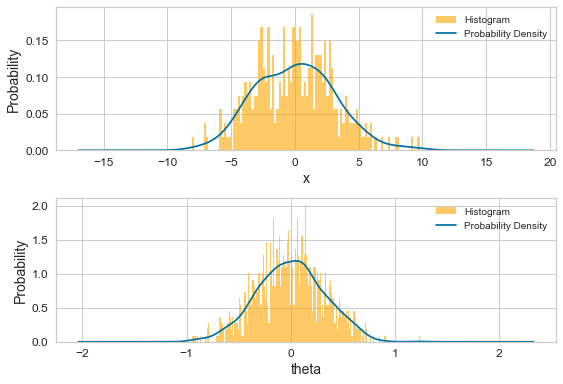

式3-51中，采样均值加权：75.00%；先验加权：25.00%
观测均值m_N：0.020997378401557208；先验mu_0：0
数值计算mu：-0.0021662928927906277；理论计算mu_N：0.015748033801167904
数值计算与式3-51误差：113.76%
************************************x_nums=3000, theta_nums=1000************************************
Saving figure x与mu采样图, x_sample=3000


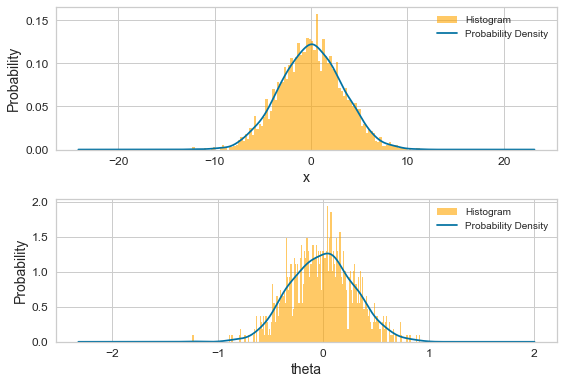

式3-51中，采样均值加权：96.77%；先验加权：3.23%
观测均值m_N：0.0161444900788033；先验mu_0：0
数值计算mu：0.0007075390997496385；理论计算mu_N：0.01562370007626126
数值计算与式3-51误差：95.47%


In [3]:
import pdf_estimation
import numpy as np
np.random.seed(42)
for x_sample in [10, 30, 300, 3000]:
    pdf_estimation.run_BE(x_sample)

**这里面模型均值设为0，可以看出来虽然理论计算与程序数值计算差别较大，但是数值计算更接近真实值“0”，但是数值计算不应该以理论计算为模板吗，为什么比理论计算还要精确？**

# 2 非参数估计

## 2.1 直方图法

***********************************************直方图方法************************************************
Saving figure 直方图方法，n=1000，k=10


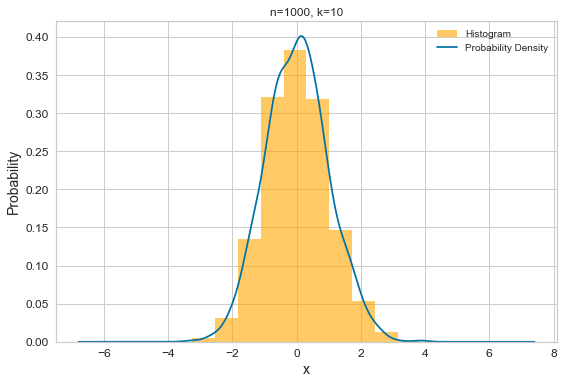

***********************************************直方图方法************************************************
Saving figure 直方图方法，n=1000，k=500


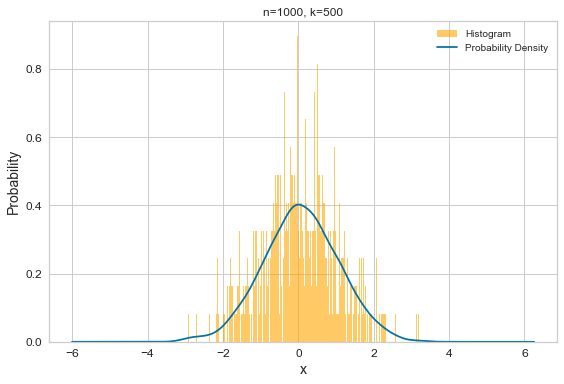

***********************************************直方图方法************************************************
Saving figure 直方图方法，n=10000，k=100


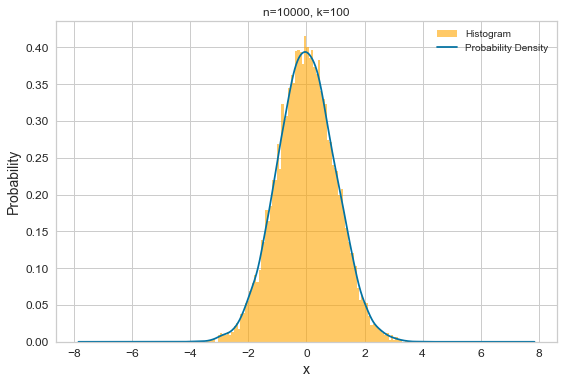

In [6]:
import pdf_estimation
import numpy as np
np.random.seed(42)
for (n, k) in [(1000, 10), (1000,500), (10000, 100)]:
    pdf_estimation.run_histogram(n, k)

**可以看出来，三张图分别代表了小窗过宽，过窄，刚刚好，这三种情况**

## 2.2 K_N近邻法

**********************************************K_N近邻法估计**********************************************
Saving figure k_n近邻法, n=16, k_n=4


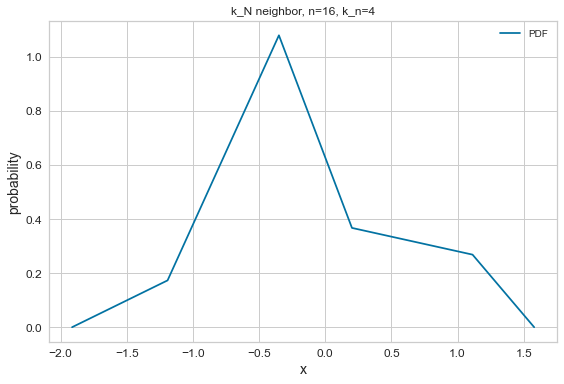

**********************************************K_N近邻法估计**********************************************
Saving figure k_n近邻法, n=256, k_n=16


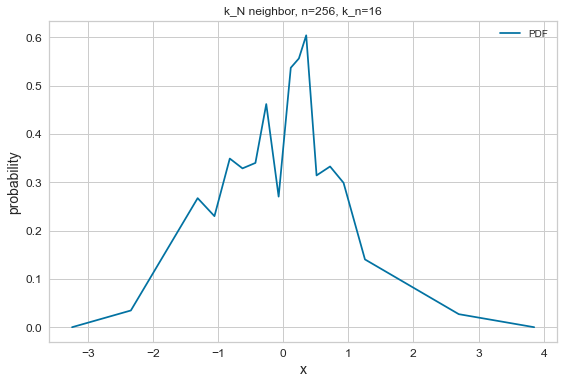

**********************************************K_N近邻法估计**********************************************
Saving figure k_n近邻法, n=100000000, k_n=100000


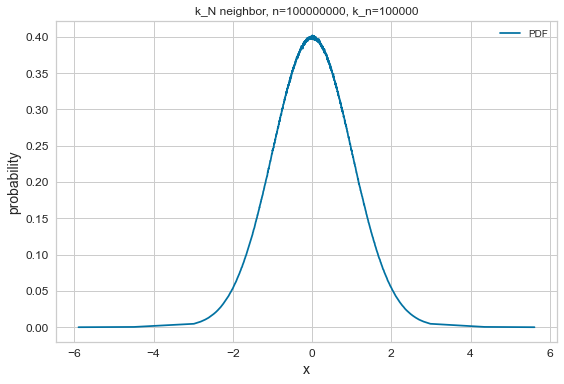

In [1]:
import pdf_estimation
import numpy as np
np.random.seed(42)
for (n, k_n) in [(16, 4), (256, 16), (100000000, 100000)]:
    pdf_estimation.run_k_n_neighbor(n, k_n)

## 2.3 Parzen窗法

**********************************************Parzen窗法**********************************************
Saving figure rectangular window parzen, n=16, h=0.25


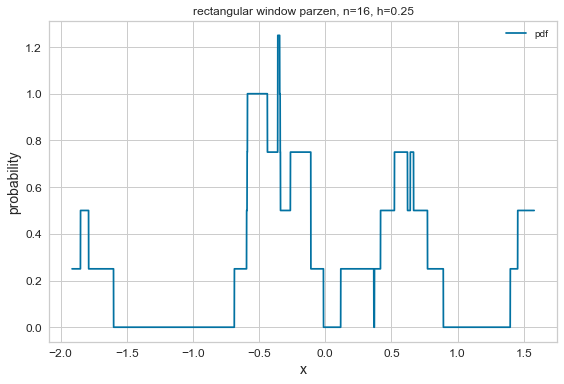

**********************************************Parzen窗法**********************************************
Saving figure rectangular window parzen, n=256, h=0.25


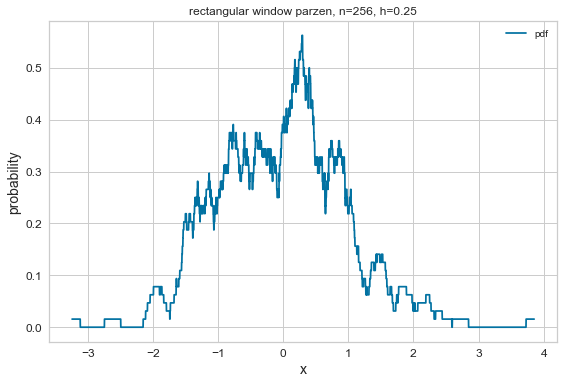

**********************************************Parzen窗法**********************************************
Saving figure rectangular window parzen, n=10000, h=0.25


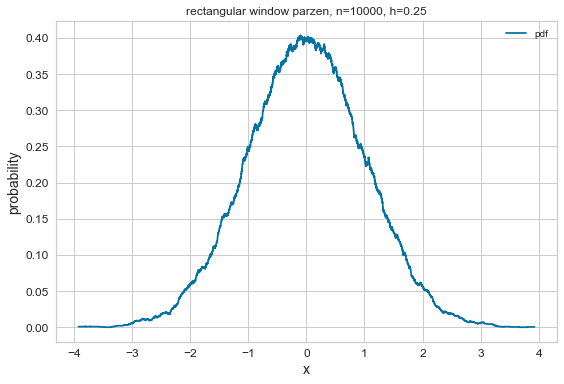

**********************************************Parzen窗法**********************************************
Saving figure rectangular window parzen, n=100000, h=0.25


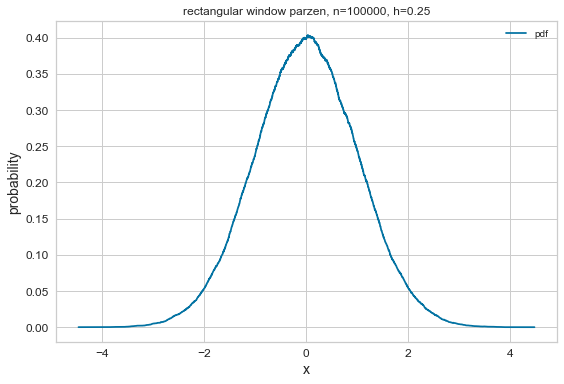

In [1]:
import pdf_estimation
import numpy as np
np.random.seed(42)
for (n, h) in [(16, 0.25), (256, 0.25), (10000, 0.25), (100000, 0.25)]:
    pdf_estimation.run_parzen(n, h)